# Taufiq July Kurniawan_Posttest 4 dan Posttest 5
# 2009106138

Import Library yang di butuhkan

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #standarisasi
from sklearn.preprocessing import MinMaxScaler #normalisasi
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#visualisasi uji

import matplotlib.pyplot as plt
import seaborn as sns

Read Dataset

In [42]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
data

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Info Dataset

In [43]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


Mengecek Missing Value

In [44]:
data.describe()

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


Melihan Panjang Dataset

In [45]:
print(f"panjang dataset {len(data)} baris")

panjang dataset 5268 baris


Membagi data menjadi Data latih dan Test

In [46]:
data_X = data[["index", "Aboard", "Fatalities", "Ground"]].values
label_Y = data[["Date","Time", "Location", "Operator", "Flight #", "Route", "Type", "Registration", "cn/In","Summary"]].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(data_X, label_Y, test_size=.2)

In [48]:
print(f'the length of data train is {len(x_train)} row',
      f'the length of label train is {len(y_train)} row',
      f'the length of data test is {len(x_test)} row',
      f'the length of label test is {len(y_test)} row',
      f'the length of total dataset is {len(data)} row',
      sep='\n')

the length of data train is 4214 row
the length of label train is 4214 row
the length of data test is 1054 row
the length of label test is 1054 row
the length of total dataset is 5268 row


Copy dataset dan disimpan ke dalam Variabel Dataset_transformasi

In [49]:
dataset_transformasi = data.copy()

Normalisai

In [50]:
scaler = MinMaxScaler()
normalize_dataset = scaler.fit_transform(dataset_transformasi[["Aboard"]])
normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns= {0:"ABB"}, inplace=True)
normalize_dataset

,ABB
0,0.003106
1,0.007764
2,0.001553
3,0.031056
4,0.046584
...,...
5263,0.173913
5264,0.006211
5265,0.354037
5266,0.001553


Menghapus Kolom Dataset yang bertype object karena hanya menggunakan kolom yang bertype data Float atau Numerik,dan di simpan ke dalam variabel data_baru

In [51]:
data_baru = data.drop(["Date","Time", "Location", "Operator", "Flight #", "Route", "Type", "Registration", "cn/In","Summary"],axis =1)

In [52]:
data_baru

,index,Aboard,Fatalities,Ground
0,0,2.0,1.0,0.0
1,1,5.0,5.0,0.0
2,2,1.0,1.0,0.0
3,3,20.0,14.0,0.0
4,4,30.0,30.0,0.0
...,...,...,...,...
5263,5263,112.0,98.0,2.0
5264,5264,4.0,4.0,NaN
5265,5265,228.0,228.0,0.0
5266,5266,1.0,1.0,0.0


Standarisasi

In [53]:
data_baru.drop("Aboard", axis=1, inplace=True)
# buat alat
standard_std = StandardScaler()

In [54]:
# standarisasikan
scaled_dataset = standard_std.fit_transform(data_baru)

Data Scaling

In [55]:
print("Data Sebelum Scaling :")
data_baru

Data Sebelum Scaling :


,index,Fatalities,Ground
0,0,1.0,0.0
1,1,5.0,0.0
2,2,1.0,0.0
3,3,14.0,0.0
4,4,30.0,0.0
...,...,...,...
5263,5263,98.0,2.0
5264,5264,4.0,NaN
5265,5265,228.0,0.0
5266,5266,1.0,0.0


In [56]:
print("DataSetelah Scaling :")
scaled_dataset

DataSetelah Scaling :


array([[-1.73172205, -0.57440195, -0.02980298],
       [-1.73106448, -0.45390838, -0.02980298],
       [-1.7304069 , -0.57440195, -0.02980298],
       ...,
       [ 1.7304069 ,  6.26360785, -0.02980298],
       [ 1.73106448, -0.57440195, -0.02980298],
       [ 1.73172205, -0.21292125, -0.02980298]])

In [57]:
data.isna()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,True,False,False,False,False
2,False,False,True,False,False,False,True,False,True,True,False,False,False,False
3,False,False,False,False,False,True,True,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5264,False,False,True,False,False,True,False,False,False,False,False,False,True,False
5265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5266,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [58]:
df = data_baru.copy()

Hapus dataset Yang bernilai Null

In [59]:
df.isna().sum()

index          0
Fatalities    12
Ground        22
dtype: int64

In [60]:
# bikin alat
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_modus = SimpleImputer(strategy="most_frequent")

In [61]:
# modus
data_baru["Fatalities"] = imputer_modus.fit_transform(data_baru[["Fatalities"]])

In [62]:
data_baru.isna().sum()

index          0
Fatalities     0
Ground        22
dtype: int64

In [63]:
#mean
data_baru["Ground"] = imputer_mean.fit_transform(data_baru[["Ground"]])
data_baru.isna().sum()

index         0
Fatalities    0
Ground        0
dtype: int64

In [64]:
data_baru.dropna(inplace=True)

data_baru.isna().sum()

index         0
Fatalities    0
Ground        0
dtype: int64

In [65]:
dataset_duplicate = data_baru.copy()

In [66]:
dataset_duplicate.duplicated().sum()

0

In [67]:
dataset_duplicate.dtypes

index           int64
Fatalities    float64
Ground        float64
dtype: object

In [68]:
df = dataset_duplicate["Fatalities"].astype("int32").dtypes

In [69]:
df = dataset_duplicate["Fatalities"].astype("int32").head()

In [70]:
df

0     1
1     5
2     1
3    14
4    30
Name: Fatalities, dtype: int32

In [71]:
dataset_duplicate.head(5)

,index,Fatalities,Ground
0,0,1.0,0.0
1,1,5.0,0.0
2,2,1.0,0.0
3,3,14.0,0.0
4,4,30.0,0.0


In [72]:
dataset_duplicate["Fatalities"].unique()

array([  1.,   5.,  14.,  30.,  21.,  19.,  20.,  22.,  27.,  23.,  24.,
        18.,   2.,   4.,   3.,  46.,  34.,   7.,  17.,   6.,  52.,   8.,
         0.,  10.,   9.,  16.,  48.,  15.,  73.,  12.,  11.,  50.,  13.,
        35.,  25.,  29.,  26.,  40.,  31.,  28.,  59.,  45.,  44.,  39.,
        32.,  87.,  38.,  53.,  43.,  41.,  37.,  33.,  55.,  80.,  58.,
        36.,  56.,  70., 129.,  42.,  47.,  66.,  74., 128.,  62.,  67.,
        79.,  61.,  49.,  99.,  64.,  51.,  65.,  60.,  68.,  63.,  54.,
        78.,  72.,  83.,  77.,  95., 111., 107., 130., 112.,  81.,  84.,
        94.,  86.,  97., 101., 118.,  85.,  57., 119., 117., 133., 124.,
        98.,  82., 126.,  88., 123., 155., 120., 100.,  90.,  92., 102.,
       109.,  75.,  93., 163.,  69.,  91., 104., 115., 122., 156., 174.,
       103., 176., 110., 108.,  89., 106.,  96., 346., 191., 113., 188.,
        76., 154., 583., 131., 213., 137., 183., 271., 178., 257., 146.,
       166., 301., 180., 132., 145., 269., 181., 24

One Hot Encoding

In [73]:
encoder_ordinal = OrdinalEncoder()
dataset_duplicate["Fatalities"] = encoder_ordinal

In [74]:
temp_dataset = pd.get_dummies(dataset_duplicate[["Fatalities"]])

temp_dataset = pd.DataFrame(temp_dataset)

dataset_duplicate.drop("Fatalities", axis=1, inplace=True)

dataset_one_hot = dataset_duplicate.join(temp_dataset)

dataset_one_hot

,index,Ground,Fatalities_OrdinalEncoder()
0,0,0.000000,1
1,1,0.000000,1
2,2,0.000000,1
3,3,0.000000,1
4,4,0.000000,1
...,...,...,...
5263,5263,2.000000,1
5264,5264,1.608845,1
5265,5265,0.000000,1
5266,5266,0.000000,1


# Postest5

# Algoritma KNN dan Naive Bayes

In [75]:
from sklearn.model_selection import train_test_split
 
X = dataset_one_hot.drop(["Fatalities_OrdinalEncoder()"],axis =1)
y = dataset_one_hot["Fatalities_OrdinalEncoder()"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [76]:
print(f'Total # Sampel dataset: {len(X)}')
print(f'Total # Sampel train dataset: {len(X_train)}')
print(f'Total # Sampel test dataset: {len(X_test)}')

Total # Sampel dataset: 5268
Total # Sampel train dataset: 4741
Total # Sampel test dataset: 527


In [77]:
X_train.describe().round(1)

,index,Ground
count,4741.0,4741.0
mean,2630.7,1.7
std,1518.1,56.7
min,0.0,0.0
25%,1312.0,0.0
50%,2635.0,0.0
75%,3939.0,0.0
max,5267.0,2750.0


In [78]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'DecisionTree', 'LinearRegresion'])

# KNN

In [79]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Naive Bayes

In [80]:
# store the feature matrix (X) and response vector (y)
X = data_X
y = label_y
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=1)
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)

from sklearn import metrics
print("Tingkat Akurasi Mencapai :",
metrics.accuracy_score(y_test, y_pred)*100)

NameError: name 'label_y' is not defined

# Evaluasi Model

## Clasification

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x = X_train
y = label_y
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.1, random_state=123)
# Classification menggunakan Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6

    accuracy                           0.27        15
   macro avg       0.09      0.33      0.14        15
weighted avg       0.07      0.27      0.11        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Correlation Matrix untuk Classification ')

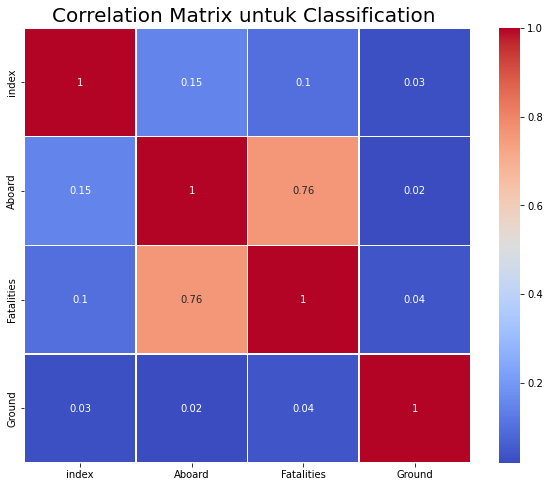

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Classification ", size=20)

## Regresi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)
r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.9091166623808649
RMSE: 0.25202649631963525
